##### Import Dataset

In [13]:
import pandas as pd
df=pd.read_csv('adult.csv', on_bad_lines='skip')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40905,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
40906,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40907,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
40908,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
# Melihat distribusi target variable
df['income'].value_counts()

<=50K    31509
>50K      9401
Name: income, dtype: int64

In [15]:
# Melihat Null value
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### Import Pycaret and Setup the classifier
Pada tahap ini, kami langsung mengimport semua fungsi dari pycaret.classification. Tidak seperti sklearn yang mana harus melakukan train_test_split secara manual, pycaret mengautomasi hal ini. Cukup dengan men-define `target` sesuai dengan dependent variable (dalam kasus ini adalah `income`).

In [16]:
from pycaret.classification import *

In [17]:
clf=setup(data=df,target='income')

,Description,Value
0,session_id,6985
1,Target,income
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(40910, 15)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Sebelum mengeluarkan hasil seperti diatas, pycaret meminta memastikan terkait tipe data dari masing-masing feature.  

Pada tabel tersebut dijelaskan segala macam parameter yang digunakan dan tidak digunakan, mulai dari dimensi train-test data, hingga apakah membenahi imbalance dataset atau tidak.

##### Comparing models
Pycaret memungkinkan untuk membandingkan beberapa model klasifier hanya dengan satu baris kode. Hal ini akan kami terapkan pada langkah selanjutnya.

In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8888,0.9342,0.7017,0.7953,0.7454,0.6746,0.6769,4.800
lightgbm,Light Gradient Boosting Machine,0.8727,0.9269,0.6397,0.7730,0.6999,0.6200,0.6246,0.474
et,Extra Trees Classifier,0.8720,0.9284,0.6782,0.7472,0.7107,0.6288,0.6302,6.490
gbc,Gradient Boosting Classifier,0.8612,0.9152,0.5564,0.7826,0.6502,0.5668,0.5797,5.828
dt,Decision Tree Classifier,0.8593,0.8030,0.6981,0.6966,0.6971,0.6055,0.6057,0.685
ada,Ada Boost Classifier,0.8575,0.9095,0.5937,0.7406,0.6589,0.5702,0.5759,1.709
lda,Linear Discriminant Analysis,0.8433,0.8894,0.5457,0.7118,0.6177,0.5213,0.5287,0.823
ridge,Ridge Classifier,0.8396,0.0000,0.4758,0.7399,0.5791,0.4857,0.5038,0.082
lr,Logistic Regression,0.8038,0.6132,0.2614,0.7112,0.3750,0.2899,0.3434,1.273
nb,Naive Bayes,0.7957,0.7971,0.2604,0.6485,0.3712,0.2750,0.3161,0.142


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6985, verbose=0,
                       warm_start=False)

Hasil diatas didapatkan dengan 10-Fold CV.

Selain dengan kode yang sangat singkat, pycaret juga langsung menemukan hyperparameter pada model yang mempunyai overall performance yang terbaik (dalam kasus ini RandomForest).

Setelah mendapatkan model terbaik dari hasil perbandingan diatas, langkah selanjutnya adalah membuat model terbaik tersebut, yang mana `rf`.

##### Create Model

Langkah selanjutnya adalah membuat model `rf` yang disimpan pada `clf_model`.

In [21]:
clf_model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8963,0.9337,0.6932,0.8321,0.7564,0.6912,0.6958
1,0.8883,0.9348,0.6867,0.8028,0.7403,0.6696,0.6729
2,0.8851,0.9307,0.7169,0.7715,0.7432,0.6693,0.6701
3,0.8862,0.9309,0.7184,0.7744,0.7453,0.6722,0.6729
4,0.8823,0.9244,0.6973,0.7730,0.7332,0.6580,0.6594
5,0.8820,0.9341,0.6822,0.7810,0.7283,0.6534,0.6558
6,0.8886,0.9415,0.7003,0.7949,0.7446,0.6737,0.6759
7,0.8872,0.9292,0.6898,0.7965,0.7393,0.6678,0.6706
8,0.8935,0.9402,0.7123,0.8058,0.7562,0.6884,0.6905
9,0.8987,0.9426,0.7199,0.8213,0.7673,0.7029,0.7054


Dengan 10-Fold CV, hasil evaluasi yang didapatkan ditulis ke dalam tabel.

##### Hypertune the Model

In [22]:
clf_model_hypertune=tune_model(clf_model, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8404,0.8839,0.5338,0.7072,0.6084,0.5106,0.5186
1,0.8516,0.8972,0.5211,0.7638,0.6195,0.5314,0.5464
2,0.8446,0.8821,0.4940,0.7506,0.5958,0.5047,0.5216
3,0.8446,0.8828,0.5316,0.7248,0.6134,0.5190,0.5288
4,0.8443,0.8808,0.4819,0.7583,0.5893,0.4991,0.5186
5,0.8492,0.8752,0.4834,0.7829,0.5978,0.5113,0.5338
6,0.8435,0.9016,0.5316,0.7204,0.6118,0.5166,0.5259
7,0.8407,0.8812,0.4834,0.7396,0.5847,0.4915,0.5085
8,0.8453,0.8891,0.4849,0.7612,0.5925,0.5027,0.5222
9,0.8484,0.8867,0.4880,0.7751,0.5989,0.5113,0.5321


In [28]:
clf_model_hypertune_optuna=tune_model(clf_model, search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8600,0.9116,0.5338,0.7960,0.6391,0.5564,0.5734
1,0.8684,0.9198,0.5678,0.8073,0.6667,0.5877,0.6019
2,0.8589,0.9094,0.5482,0.7778,0.6431,0.5585,0.5717
3,0.8596,0.9089,0.5633,0.7695,0.6504,0.5652,0.5760
4,0.8596,0.9071,0.5482,0.7811,0.6442,0.5601,0.5738
5,0.8565,0.9071,0.5346,0.7768,0.6334,0.5479,0.5627
6,0.8585,0.9204,0.5617,0.7659,0.6481,0.5622,0.5728
7,0.8557,0.9101,0.5467,0.7642,0.6374,0.5504,0.5625
8,0.8603,0.9137,0.5452,0.7870,0.6441,0.5607,0.5754
9,0.8627,0.9194,0.5512,0.7939,0.6507,0.5687,0.5833


Setelah mencoba menggunakan automated hypertune, model baseline masih mendapatkan skor paling tinggi.
Selanjutnya akan dicoba menggunakan ensemble dan akan men-define `choose_better = True`. Hal ini dilakukan agar apabila hyperparameter tuning tidak membuahkan hasil yang bagus, maka akan mengembalikan model semula (dalam hal ini `clf_model` atau baseline)

In [29]:
ensemble_model(clf_model, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8914,0.9353,0.6647,0.8340,0.7397,0.6722,0.6792
1,0.8883,0.9357,0.6762,0.8105,0.7373,0.6671,0.6715
2,0.8834,0.9298,0.6852,0.7845,0.7315,0.6575,0.6599
3,0.8781,0.9279,0.6837,0.7656,0.7224,0.6446,0.6463
4,0.8767,0.9231,0.6717,0.7676,0.7165,0.6382,0.6405
5,0.8844,0.9327,0.6657,0.8022,0.7276,0.6550,0.6596
6,0.8851,0.9387,0.6792,0.7954,0.7327,0.6601,0.6635
7,0.8778,0.9279,0.6536,0.7834,0.7126,0.6358,0.6400
8,0.8851,0.9392,0.6852,0.7913,0.7345,0.6616,0.6644
9,0.8893,0.9407,0.6867,0.8071,0.7421,0.6722,0.6757


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6985, verbose=0,
                       warm_start=False)

Hasil diatas menunjukkan bahwa baseline model yaitu `clf_model` masih unggul di antara yang lain meskipun telah dicoba dengan fungsi hyperparameter tuning dan juga ensemble yang dimiliki oleh pycaret. 

Jadi, best model yang didapatkan kelompok kami untuk kasus klasifikasi kami adalah sesuai dengan `clf_model` dengan hyperparameter dan confusion matrix terhadap testing data seperti berikut:

In [30]:
clf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6985, verbose=0,
                       warm_start=False)

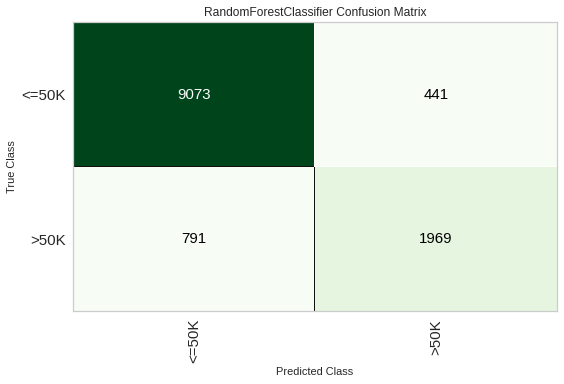

In [33]:
# confusion matrix pada test_set
plot_model(clf_model, plot='confusion_matrix', use_train_data=False)

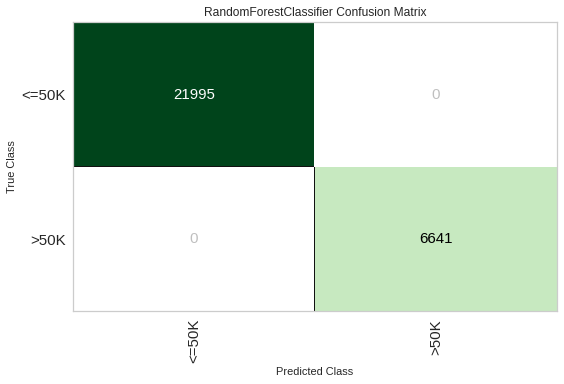

In [34]:
plot_model(clf_model, plot='confusion_matrix', use_train_data=True)

Baik confusion matrix untuk training data dan testing data sama-sama tidak seimbang, hal ini dikarenakan dataset yang sejak awal juga memang sudah tidak seimbang (imbalance). 

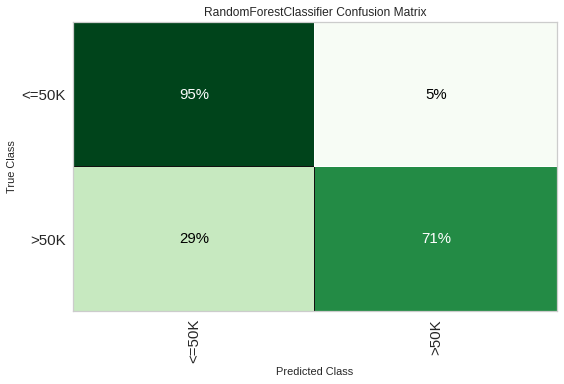

In [35]:
plot_model(clf_model, plot='confusion_matrix', use_train_data=False, plot_kwargs={'percent':True})

Ketidakseimbangan hasil ditunjukkan oleh confusion matrix di atas. Model lebih akurat dalam memprediksi kelas `<=50K` dibanding dengan kelas `>50K`. Hal ini dikarenakan sejak awal data digunakan, kelas sudah tidak seimbang dengan detail sebagai berikut:

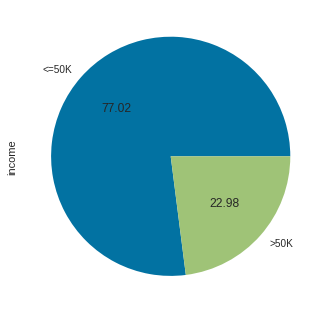

In [41]:
import matplotlib.pyplot as plt
df['income'].value_counts().plot(kind='pie',autopct='%.2f')

Untuk bisa meningkatkan performa model lebih lanjut, mungkin bisa berfokus untuk memperbaiki data agar mempunyai kelas yang seimbang.

Kami akan menggunakan teknik oversampling dengan tujuan untuk meningkatkan jumlah kelas minoritas agar menjadi seimbang dengan kelas mayoritas.

In [42]:
# Memisahkan independent dan dependent variable
X=df.drop(['income'],axis=1)
y=df['income']

In [43]:
# Import library untuk oversampling dan melakukan oversampling
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy='not majority')
X_res, y_res=ros.fit_resample(X, y)

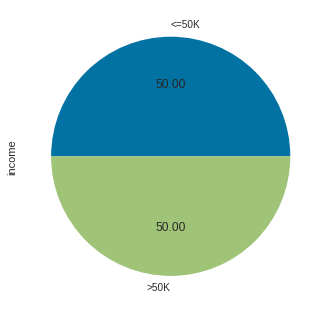

In [44]:
y_res.value_counts().plot(kind='pie',autopct='%.2f')

In [45]:
y_res.value_counts()

<=50K    31509
>50K     31509
Name: income, dtype: int64

Pie chart diatas membuktikan bahwa target variable sudah seimbang. Langkah selanjutnya adalah mengulangi pencarian model terbaik, namun dengan data baru yang sudah di oversampling tersebut. Namun sebelumnya, bisa menyatukan kembali dependent dan independent variable dengan fungsi `concat` pada pandas.

In [46]:
X_res

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63013,42,Private,192381,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
63014,24,Private,317175,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
63015,61,Private,51385,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
63016,47,State-gov,100818,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States


In [49]:
df_balanced=pd.concat([X_res,y_res],axis=1)
df_balanced.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


#### Setup Classifier dan Compare models

In [50]:
clf2=setup(data=df_balanced,target='income')

,Description,Value
0,session_id,4046
1,Target,income
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(63018, 15)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9452,0.9886,0.9778,0.9178,0.9469,0.8905,0.8924,7.810
et,Extra Trees Classifier,0.9434,0.9921,0.9720,0.9193,0.9449,0.8868,0.8883,9.334
dt,Decision Tree Classifier,0.9327,0.9328,0.9724,0.9007,0.9352,0.8654,0.8682,0.975
lightgbm,Light Gradient Boosting Machine,0.8559,0.9363,0.8918,0.8316,0.8607,0.7119,0.7138,0.669
gbc,Gradient Boosting Classifier,0.8326,0.9168,0.8666,0.8110,0.8378,0.6653,0.6669,9.667
ada,Ada Boost Classifier,0.8249,0.9100,0.8480,0.8100,0.8285,0.6498,0.6506,2.523
ridge,Ridge Classifier,0.8061,0.0000,0.8582,0.7768,0.8154,0.6123,0.6158,0.113
lda,Linear Discriminant Analysis,0.8061,0.8902,0.8583,0.7767,0.8154,0.6123,0.6158,1.320
knn,K Neighbors Classifier,0.7553,0.8440,0.8391,0.7181,0.7739,0.5107,0.5182,2.748
lr,Logistic Regression,0.6391,0.6993,0.6177,0.6393,0.6262,0.2782,0.2807,2.026


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4046, verbose=0,
                       warm_start=False)

In [53]:
clf_model2=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9420,0.9873,0.9755,0.9140,0.9438,0.8840,0.8860
1,0.9422,0.9865,0.9714,0.9176,0.9437,0.8844,0.8859
2,0.9436,0.9906,0.9782,0.9146,0.9453,0.8871,0.8893
3,0.9429,0.9869,0.9782,0.9134,0.9447,0.8858,0.8880
4,0.9513,0.9906,0.9805,0.9262,0.9525,0.9025,0.9041
5,0.9501,0.9888,0.9809,0.9238,0.9515,0.9003,0.9020
6,0.9429,0.9877,0.9777,0.9138,0.9447,0.8858,0.8879
7,0.9440,0.9877,0.9791,0.9147,0.9458,0.8880,0.8902
8,0.9424,0.9886,0.9755,0.9148,0.9442,0.8848,0.8868
9,0.9510,0.9908,0.9809,0.9254,0.9524,0.9021,0.9037


In [54]:
clf_model_hypertune_optuna2=tune_model(clf_model2, search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8343,0.9169,0.8924,0.7991,0.8432,0.6687,0.6733
1,0.8200,0.9154,0.8433,0.8053,0.8239,0.6401,0.6408
2,0.8245,0.9188,0.8969,0.7830,0.8361,0.6492,0.6561
3,0.8132,0.9104,0.8632,0.7842,0.8218,0.6265,0.6297
4,0.8263,0.9189,0.9000,0.7839,0.8380,0.6528,0.6600
5,0.8229,0.9160,0.8669,0.7963,0.8301,0.6459,0.6485
6,0.8202,0.9112,0.8819,0.7846,0.8304,0.6405,0.6455
7,0.8143,0.9082,0.8605,0.7872,0.8222,0.6287,0.6315
8,0.8370,0.9215,0.8891,0.8047,0.8448,0.6741,0.6778
9,0.8309,0.9205,0.8919,0.7944,0.8403,0.6618,0.6669


Dari kedua hasil diatas, didapatkan RandomForest terbaik dengan parameter seperti berikut:

In [55]:
clf_model2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4046, verbose=0,
                       warm_start=False)

Sedangkan untuk confusion matrix yang didapatkan adalah sebagai berikut:

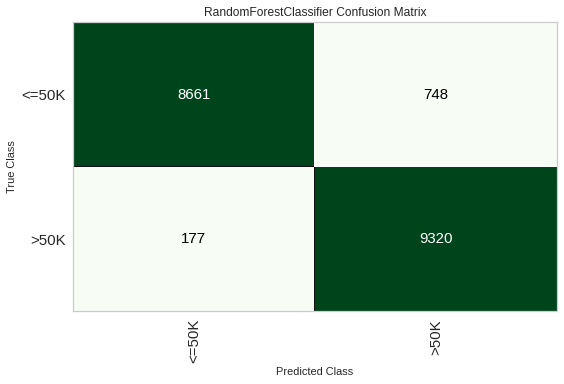

In [56]:
# confusion matrix pada test_set
plot_model(clf_model2, plot='confusion_matrix', use_train_data=False)

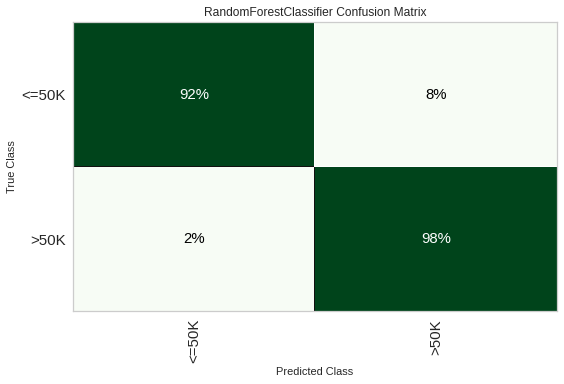

In [59]:
# Confusion matrix percentage
plot_model(clf_model2, plot='confusion_matrix', use_train_data=False, plot_kwargs={'percent':True})

Model klasifikasi setelah dilakukan oversampling mendapatkan skor `akurasi 94.52%` dengan `f1-score 94.38%`. Sedangkan model klasifikasi sebelum dilakukan oversampling mendapatkan skor `akurasi 88.88%` dan `f1-score 74.54%`. Dengan melakukan oversampling pada dataset `Adult`, berhasil meningkatkan akurasi sebesar `5.64%` dan f1-score sebesar `19.84%`.